<p>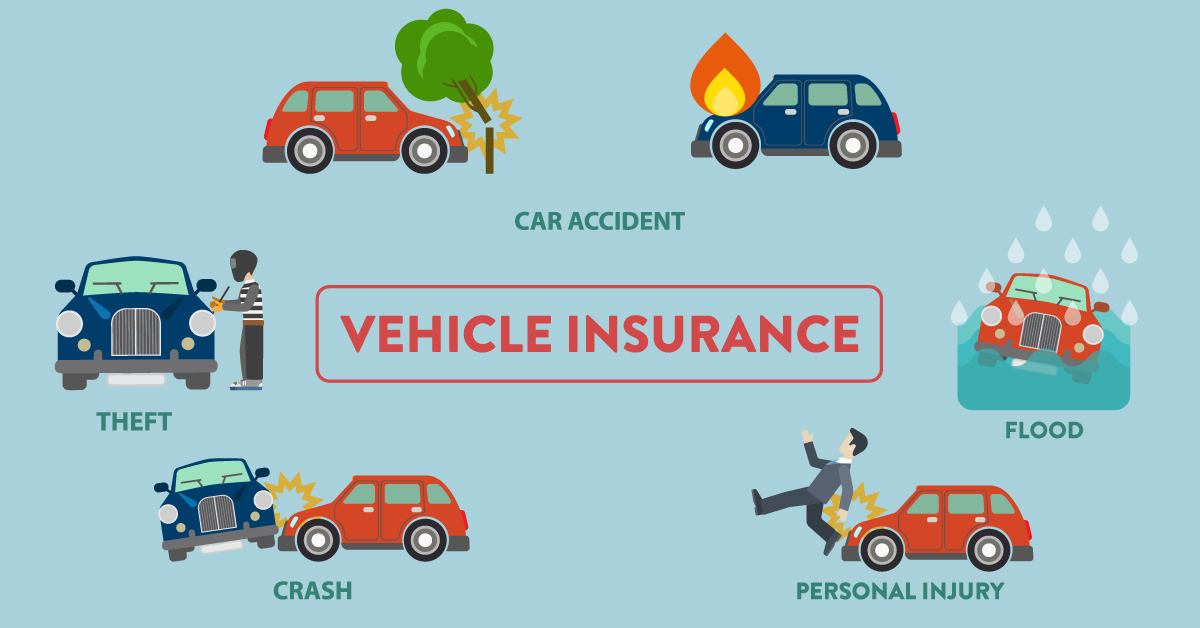
<p><em>Rotten Tomatoes Logo. </em></p>

# Problem 
- Many insurance worker spend a lot of their time having meeting with prospective client without knowing the probabily of that customer to buy the insurance product

# Goals
- Do Exploratory Data Analysis to find what factors influence `response`
- Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv', index_col='id')
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


- `id` = "Unique ID for the customer.",
- `Gender` = "Gender of the customer.",
- `Age` = "Age of the customer.",
- `Driving_License` = "0: Doesn't have DL, 1: have DL.",
- `Region_Code` = "Unique code for the region of the customer.",
- `Previously_Insured` = "1 : Customer already has Vehicle insurance, 0 : Customer doesn't have Vehicle insurance.",
- `Vehicle_Age` = "Age of the Vehicle.",
- `Vehicle_Damage` = "1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.",
- `Annual_Premium` = "The amount customer needs to pay as premium in the year.",
- `Policy_Sales_Channel` = "Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.",
- `Vintage`  =   "Number of Days, Customer has been associated with the company.",
- `Response` = "1 : Customer is interested, 0 : Customer is not interested."

In [4]:
HealthDesc = []

for i in df.columns:
    HealthDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum()) / len(df)) * 100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data = HealthDesc, columns= [
                                'Data Feature',
    'Data Types',
    'Null',
    'Null Pct',
    'Unique',
    'Unique Sample'
] )

,Data Feature,Data Types,Null,Null Pct,Unique,Unique Sample
0,Gender,object,0,0.0,2,"[Female, Male]"
1,Age,int64,0,0.0,66,"[28, 29]"
2,Driving_License,int64,0,0.0,2,"[0, 1]"
3,Region_Code,float64,0,0.0,53,"[27.0, 31.0]"
4,Previously_Insured,int64,0,0.0,2,"[1, 0]"
5,Vehicle_Age,object,0,0.0,3,"[1-2 Year, > 2 Years]"
6,Vehicle_Damage,object,0,0.0,2,"[No, Yes]"
7,Annual_Premium,float64,0,0.0,48838,"[35471.0, 43421.0]"
8,Policy_Sales_Channel,float64,0,0.0,155,"[147.0, 30.0]"
9,Vintage,int64,0,0.0,290,"[41, 69]"


In [5]:
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
df.describe(include='O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [7]:
age_bin = [19,30,45, df['Age'].max()]
labels = ['Young Adult', 'Middle Age', 'Elder']
df['age_bin'] = pd.cut(df['Age'], bins=age_bin, labels = labels)

In [8]:
bin_premium_group = [2600, 25000, 50000, 100000, 200000, df['Annual_Premium'].max()]
label_bin = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']

df['premium_group'] = pd.cut(df['Annual_Premium'], bins = bin_premium_group, labels = label_bin)

In [9]:
df.columns = df.columns.str.lower()

In [10]:
df.head()

,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,age_bin,premium_group
id,,,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Middle Age,Silver
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Elder,Silver
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Elder,Silver
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Young Adult,Silver
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Young Adult,Silver


## Exploratory Data Analysis

## Checking Outliers

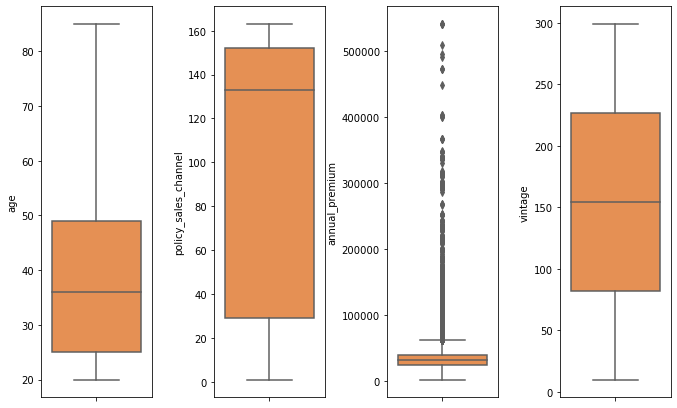

In [11]:
f, axes = plt.subplots(1, 4, figsize = (10,6.5))
f.tight_layout(pad=2.8)
sns.boxplot(y= df['age'],ax=axes[0],palette = 'YlOrRd')
sns.boxplot(y= df['policy_sales_channel'], palette = 'YlOrRd', ax=axes[1])
sns.boxplot(y= df['annual_premium'],ax=axes[2],palette = 'YlOrRd')
sns.boxplot(y= df['vintage'],ax=axes[3],palette = 'YlOrRd')

plt.show()

### Univariate

In [12]:
df.stb.freq(['gender'], cum_cols = False)

,gender,count,percent
0,Male,206089,54.07613
1,Female,175020,45.92387


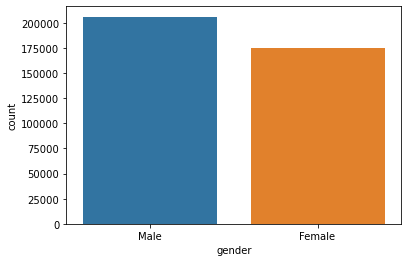

In [13]:
# plt.figure(figsize = (15, 5))
sns.countplot(df['gender'])
plt.show()

In [14]:
df.stb.freq(['age'], cum_cols = False).head()

,age,count,percent
0,24,25960,6.811700
1,23,24256,6.364583
2,22,20964,5.500788
3,25,20636,5.414724
4,21,16457,4.318187


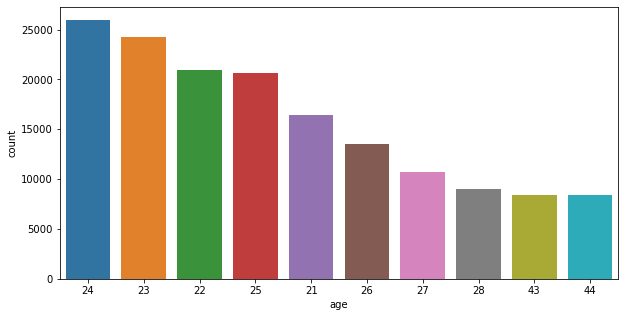

In [15]:
plt.figure(figsize = (10, 5))
sns.countplot(df['age'], order=df.age.value_counts().iloc[:10].index)
plt.show()

In [16]:
df.stb.freq(['driving_license'], cum_cols=False)

,driving_license,count,percent
0,1,380297,99.786938
1,0,812,0.213062


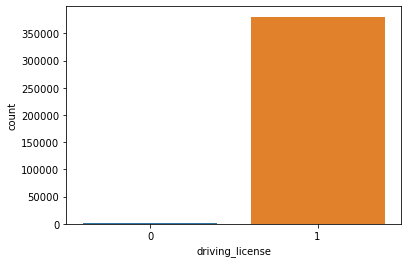

In [17]:
# plt.figure(figsize = (15, 5))
sns.countplot(df['driving_license'])
plt.show()

In [18]:
df.stb.freq(['region_code'], cum_cols=False).head()

,region_code,count,percent
0,28.0,106415,27.922458
1,8.0,33877,8.889058
2,46.0,19749,5.181982
3,41.0,18263,4.792067
4,15.0,13308,3.491914


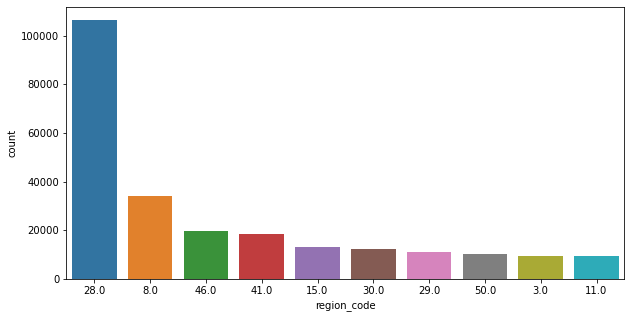

In [19]:
plt.figure(figsize = (10, 5))
sns.countplot(df['region_code'], order=df.region_code.value_counts().iloc[:10].index)
plt.show()

In [20]:
df.stb.freq(['previously_insured'], cum_cols=False).head()

,previously_insured,count,percent
0,0,206481,54.178988
1,1,174628,45.821012


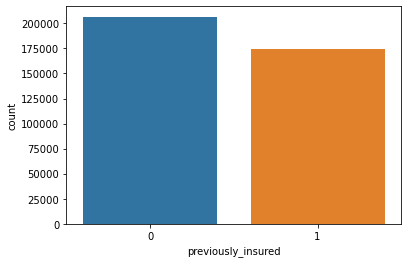

In [21]:
# plt.figure(figsize = (15, 5))
sns.countplot(df['previously_insured'])
plt.show()

In [22]:
df.stb.freq(['vehicle_age'], cum_cols=False)

,vehicle_age,count,percent
0,1-2 Year,200316,52.561341
1,< 1 Year,164786,43.238549
2,> 2 Years,16007,4.200111


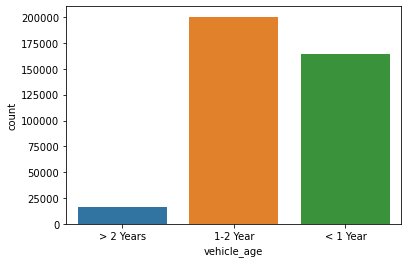

In [23]:
# plt.figure(figsize = (15, 5))
sns.countplot(df['vehicle_age'])
plt.show()

In [24]:
df.stb.freq(['vehicle_damage'], cum_cols=False)

,vehicle_damage,count,percent
0,Yes,192413,50.487656
1,No,188696,49.512344


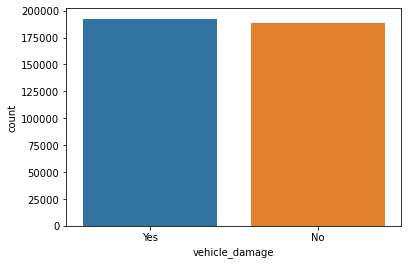

In [25]:
# plt.figure(figsize = (15, 5))
sns.countplot(df['vehicle_damage'])
plt.show()

In [26]:
df.stb.freq(['policy_sales_channel'], cum_cols=False).head()

,policy_sales_channel,count,percent
0,152.0,134784,35.366260
1,26.0,79700,20.912652
2,124.0,73995,19.415705
3,160.0,21779,5.714638
4,156.0,10661,2.797362


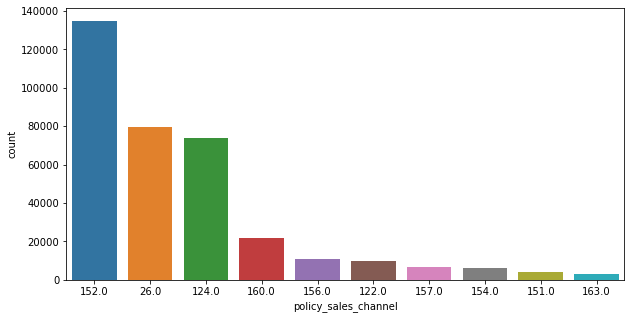

In [27]:
plt.figure(figsize = (10, 5))
sns.countplot(df['policy_sales_channel'], order=df.policy_sales_channel.value_counts().iloc[:10].index)
plt.show()

In [28]:
df.stb.freq(['response'], cum_cols=False).head()

,response,count,percent
0,0,334399,87.743664
1,1,46710,12.256336


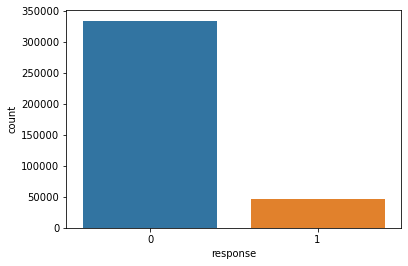

In [29]:
# plt.figure(figsize = (15, 5))
sns.countplot(df['response'])
plt.show()

In [30]:
df.stb.freq(['age_bin'], cum_cols=False).head()

,age_bin,count,percent
0,Young Adult,161461,42.366095
1,Elder,123765,32.474961
2,Middle Age,95883,25.158944


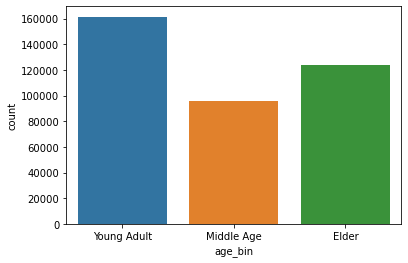

In [31]:
sns.countplot(df['age_bin'])
plt.show()

In [32]:
df.stb.freq(['premium_group'], cum_cols=False).head()

,premium_group,count,percent
0,Silver,247942,65.058028
1,Bronze,100963,26.491896
2,Gold,31426,8.245935
3,Platinum,666,0.174753
4,Diamond,112,0.029388


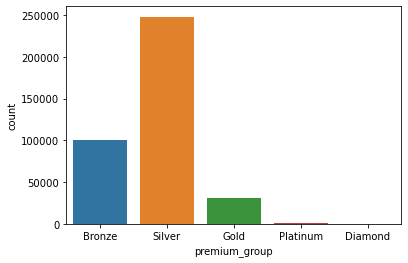

In [33]:
# plt.figure(figsize = (15, 5))
sns.countplot(df['premium_group'])
plt.show()

In [34]:
df.head()

,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,age_bin,premium_group
id,,,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Middle Age,Silver
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Elder,Silver
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Elder,Silver
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Young Adult,Silver
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Young Adult,Silver


## Multivariate

In [57]:
pd.crosstab(index = df['age'], columns = df['response'], normalize = 'columns').sort_values(1, ascending = False).head()

# the policy sales channel no 26 and policy sales channel number 124 are the 2 highest percentage of interested response

response,0,1
age,,
44,0.019575,0.038771
43,0.019833,0.038643
45,0.019163,0.038000
46,0.018457,0.036545
42,0.019007,0.035346


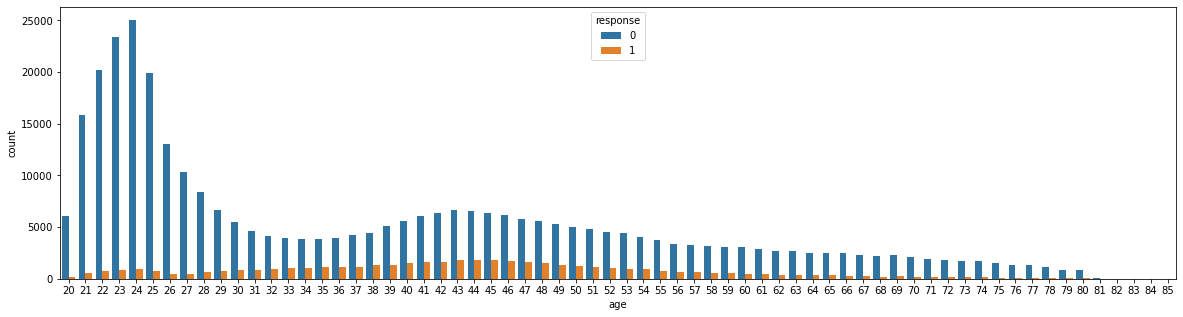

In [59]:
plt.figure(figsize=(20,5))
sns.countplot(df['age'], hue = df['response'])
plt.show()

In [35]:
pd.crosstab(index = df['response'], columns = df['gender'], normalize = 'index')

gender,Female,Male
response,,
0,0.469006,0.530994
1,0.389317,0.610683


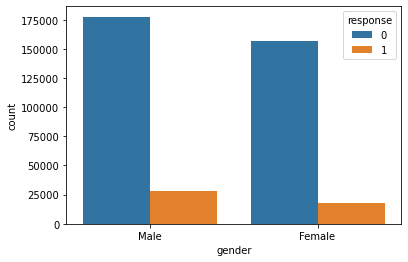

In [36]:
## gender and response 
sns.countplot(df['gender'], hue = df['response'])
plt.show()
## 61% of interested response are from male respondents

In [37]:
### average age and response
pd.crosstab(index = df['response'], columns = 'Average Age', values = df['age'], aggfunc='mean')
## the average age of customer who is interested with vehicle insurance is 43 years old
# this might show that younger customers are not interested with vehicle insurance

col_0,Average Age
response,
0,38.178227
1,43.435560


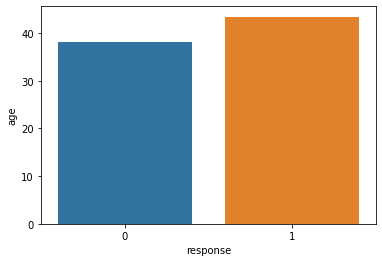

In [38]:
sns.barplot(x = df['response'], y = df['age'], ci = False)
plt.show()

In [39]:
pd.crosstab(index = df['response'], columns = df['previously_insured'], normalize = 'columns')

# almost every customer who already have a vehicle insurance is not interested with another vehicle insurance

previously_insured,0,1
response,,
0,0.774546,0.999095
1,0.225454,0.000905


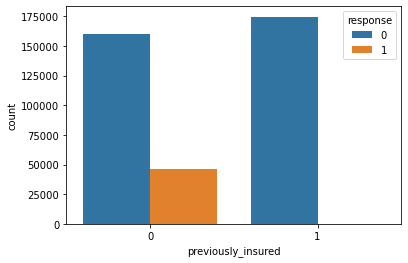

In [40]:
sns.countplot(df['previously_insured'], hue = df['response'])
plt.show()

In [41]:
pd.crosstab(index = df['response'], columns = df['vehicle_age'], normalize = 'columns')

# from the vehicle age group customer who has a newer vehicle are less likely to be interested with vehicle insurance

vehicle_age,1-2 Year,< 1 Year,> 2 Years
response,,,
0,0.826245,0.956295,0.706254
1,0.173755,0.043705,0.293746


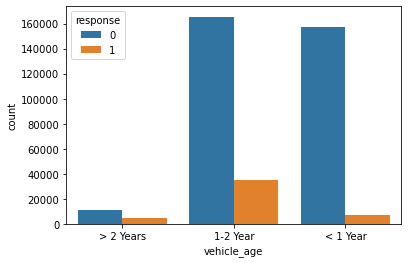

In [42]:
sns.countplot(df['vehicle_age'], hue = df['response'])
plt.show()

In [43]:
pd.crosstab(index = df['response'], columns = [df['vehicle_age'], df['previously_insured']], normalize = 'columns')

# customer who has a  newer car are more likely to have their vehicle insured

vehicle_age         1-2 Year            < 1 Year           > 2 Years          
previously_insured         0         1         0         1         0         1
response                                                                      
0                   0.742864  0.998546  0.871419  0.999433   0.70547  0.978261
1                   0.257136  0.001454  0.128581  0.000567   0.29453  0.021739

In [44]:
pd.crosstab(index = df['response'], columns = df['vehicle_damage'], normalize = 'index')

## customer who're intersted with vehicle insurance 98% have had a vehicle damage in the past

vehicle_damage,No,Yes
response,,
0,0.561347,0.438653
1,0.021023,0.978977


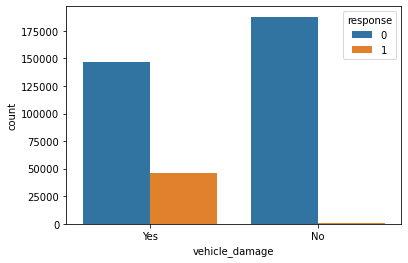

In [45]:
sns.countplot(df['vehicle_damage'], hue = df['response'])
plt.show()

In [46]:
pd.crosstab(index = df['response'], columns = [df['vehicle_damage'], df['previously_insured']], normalize = 'index')

# customer who never had any vehicle damage and has a vehicle insurance are the most likely not interested in another vehicle insurance

vehicle_damage            No                 Yes          
previously_insured         0         1         0         1
response                                                  
0                   0.069019  0.492328  0.409239  0.029414
1                   0.019482  0.001541  0.977136  0.001841

In [47]:
pd.crosstab(index = df['response'], columns = 'Mean Premium', values = df['annual_premium'], aggfunc='mean')

col_0,Mean Premium
response,
0,30419.160276
1,31604.092742


In [48]:
pd.crosstab(index = df['response'], columns = 'Average Vintage', values = df['vintage'], aggfunc='median')

col_0,Average Vintage
response,
0,154
1,154


In [49]:
pd.crosstab(index = df['response'], columns = df['premium_group'], normalize = 'columns')

# the more expensive the premium group the more likely the customer are interested with the vehicle insurance

premium_group,Bronze,Silver,Gold,Platinum,Diamond
response,,,,,
0,0.882918,0.879044,0.848024,0.848348,0.803571
1,0.117082,0.120956,0.151976,0.151652,0.196429


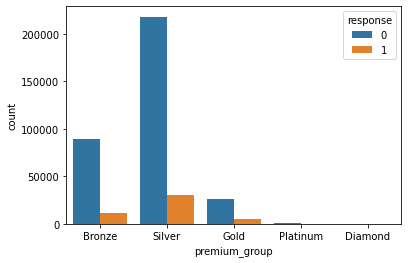

In [50]:
sns.countplot(df['premium_group'], hue = df['response'])
plt.show()
# eventhough platinum and diamond has a higher percentage of intersted responds, however there're only few numbers of customers

In [51]:
pd.crosstab(index = df['response'], columns = [df['premium_group'], df['previously_insured']], normalize = 'columns')
# for customer who does not have vehicle insurance before :
    # the more expensive the premium group the more likely the customer are interested with the vehicle insurance
    
# while for customer who's previously have vehicle insurance :
    # the more expensive the group the less likely they will sign

premium_group         Bronze              Silver                Gold  \
previously_insured         0         1         0         1         0   
response                                                               
0                   0.791091  0.998879  0.771191  0.999148  0.749921   
1                   0.208909  0.001121  0.228809  0.000852  0.250079   

premium_group                 Platinum        Diamond       
previously_insured         1         0    1         0    1  
response                                                    
0                   0.999353  0.720994  1.0  0.706667  1.0  
1                   0.000647  0.279006  0.0  0.293333  0.0

In [52]:
pd.crosstab(index = df['response'], columns = df['age_bin'], normalize = 'columns')


# Young Adult shown to be the generation that's less likely to be intersted in vehicle insurance 

age_bin,Young Adult,Middle Age,Elder
response,,,
0,0.955512,0.788763,0.844277
1,0.044488,0.211237,0.155723


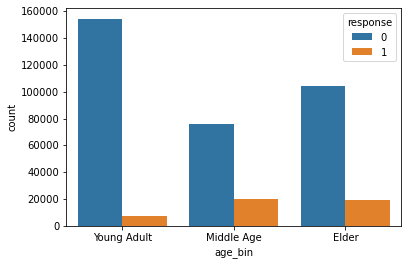

In [56]:
sns.countplot(df['age_bin'], hue = df['response'])
plt.show()

In [66]:
pd.crosstab(index = df['age_bin'], columns = df['vehicle_age'], normalize = 'index')

# majority of young adult 95% have a vehicle age below one year, and from our analysis before majority of vehicle 
# that's less then 1 year of age is already insured

vehicle_age,1-2 Year,< 1 Year,> 2 Years
age_bin,,,
Young Adult,0.047256,0.952323,0.000421
Middle Age,0.854646,0.110186,0.035168
Elder,0.894760,0.003701,0.101539


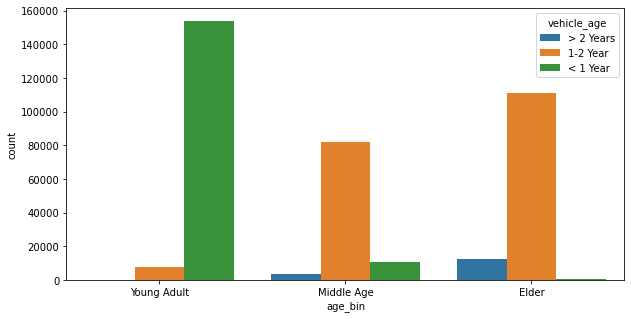

In [68]:
plt.figure(figsize = (10, 5))
sns.countplot(df['age_bin'], hue = df['vehicle_age'])
plt.show()

# this open up on how to target young adult customers by working with a dealership that sells new car, and bundling it with
# an insurance product to get the millenial generation market

In [54]:
pd.crosstab(index = df['age_bin'], columns = [df['vehicle_damage'], df['response']], normalize = 'columns')

# Out of all customers that have had vehicle damage in the past Middle Age are more likely to response interested to vehicle insurance

vehicle_damage        No                 Yes          
response               0         1         0         1
age_bin                                               
Young Adult     0.595709  0.391039  0.289430  0.148684
Middle Age      0.179694  0.393075  0.285632  0.434482
Elder           0.224597  0.215886  0.424938  0.416834

In [55]:
pd.crosstab(index = df['age_bin'], columns = df['vehicle_damage'], normalize = 'index')

# Elder with the highest vehicle damage percentage

vehicle_damage,No,Yes
age_bin,,
Young Adult,0.694948,0.305052
Middle Age,0.355819,0.644181
Elder,0.342359,0.657641


In [56]:
pd.crosstab(index = df['age_bin'], columns = df['previously_insured'], normalize = 'index')

# this shows that maybe why young adult is not interested in vehicle insurance is because 65 % of young adult already have vehicle insurance

previously_insured,0,1
age_bin,,
Young Adult,0.346102,0.653898
Middle Age,0.687995,0.312005
Elder,0.683812,0.316188


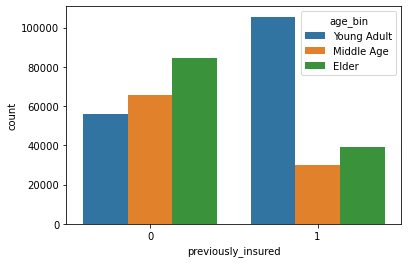

In [57]:
sns.countplot(x = df['previously_insured'], hue = df['age_bin'])
plt.show()

In [58]:
pd.crosstab(index = df['policy_sales_channel'], columns = df['response'], normalize = 'columns').sort_values(1, ascending = False).head()

# the policy sales channel no 26 and policy sales channel number 124 are the 2 highest percentage of interested response

response,0,1
policy_sales_channel,,
26.0,0.190817,0.340206
124.0,0.179423,0.299636
152.0,0.391526,0.082595
156.0,0.025012,0.049176
157.0,0.014623,0.038407


In [59]:
## Most ineffective sales channel

pd.crosstab(index = df['policy_sales_channel'], columns = df['response'], normalize = 'columns').sort_values(0, ascending = False).head()

# of all sales channel, policy sales channel number 152 seems to be the least effective to offer health insurance customers

response,0,1
policy_sales_channel,,
152.0,0.391526,0.082595
26.0,0.190817,0.340206
124.0,0.179423,0.299636
160.0,0.063708,0.010169
156.0,0.025012,0.049176


In [60]:
pd.crosstab(index = df['region_code'], columns = df['response']).sort_values(1, ascending = False).head()

# region 28 has the highest number of customers of all region that's maybe why it has the the highest number of interested response

response,0,1
region_code,,
28.0,86498,19917
8.0,30620,3257
41.0,16039,2224
46.0,17717,2032
29.0,9700,1365


In [61]:
pd.crosstab(index = df['region_code'], columns = df['response'], normalize = 'index').sort_values(1, ascending = False).head()

# if we compared region to region interested rate, region 38 has the highest percentage of interested 

response,0,1
region_code,,
38.0,0.807996,0.192004
28.0,0.812837,0.187163
19.0,0.837134,0.162866
4.0,0.841755,0.158245
23.0,0.846939,0.153061


In [64]:
df.head()

,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,age_bin,premium_group
id,,,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Middle Age,Silver
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Elder,Silver
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Elder,Silver
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Young Adult,Silver
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Young Adult,Silver


## Conclusion

- From this dataset of health insurance customers almost 95% of customers have a vehicle age that's less than 2 years. from our analysis, customers who has more than 2 years of vehicle age are more interested with vehicle insurance advertisment, while customers who has less then one year of vehicle age, only 4% of them are actually interesred with vehicle insurance

- We also found out that a newer vehicle are more likely to have a vehicle insurance, with vehicle that's less than one year 66% of those are insured , vehicle that's older than one year but less than 2 years are 33% insured, while less than one percent of vehicle that's older than 2 years are insured. This should explain why customer who owns a newer vehicle are less likely to be intersted with insurance promotion, because they probably alredy have one.

- Customers who never had vehicle damaged only 0.5 % of those customers are intersted with vehicle insurance, 87% of customers who never had any vehicle damaged already have a vehicle insurance

- Machine learning could predict whether a customer would be interested or not towards vehicle insurance product with recall 0.965 out of 1

## Recommendation
- Working together with a dealership that sells a brand new car to get young adult insurance. Our insurance company could have a bundling product of brand new vehicle and a free promotional vehicle insurance for certain period of months
- 95% customers who have had a vehicle damaged in the past still does not have a vehicle insurance, we could to a targeted marketing to this customers, by showing the benefits of having a vehicle insurance and how it will protect you if you ever had a vehicle damaged in the future
- Use Machine Learning Algorith to have predict the response outcome of a customer

Using the Logistic regression machine learning that has recall of 96.5 % will speed up and find out which customer who actually intersted in vehicle insurance, and we could focus our resource just based on the customers that's interested

## Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoding = OneHotEncoder()

In [ ]:
data = encoding.fit_transform(df[['Gender']]).toarray()

In [ ]:
encoding.categories_

In [ ]:
df_sample = pd.read_csv('train.csv')
df_sample.head()

## Machine Learning

In [ ]:
import xgboost

In [ ]:
from xgboost import XGBRegressor, XGBClassifier

In [ ]:
from sklearn.svm import SVC, SVR

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [ ]:
X = df.drop(columns='Response')
y = df.Response

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state=42)

In [ ]:
base_XGB = XGBRegressor()

In [ ]:
base_XGB.fit(X_train, y_train)